### Project: CO2 Emissions model
FuelConsumption.csv is a dataset which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

The goal of the model is to predict the CO2 Emissions that a new light-duty vehicle will produce given the parameters presented in this dataset.

For this machine learning problem, a linear regression approach will be used with a train/test split and cross validation at the end to validate the accuracy of the final model. 


Dataset features:

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **FUEL CONSUMPTION COMB in MPG (mil/gal)** e.g 27
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

##### Dataset Source: Government Canada
open.canada.ca



#### Importing needed packages: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math 
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Reading the dataset in:

In [2]:
#Reading the data into a dataframe with Pandas:
carros=pd.read_csv('../DATASETS/datasets_255305_536206_FuelConsumption.csv')
carros.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Exploratory Data analysis

In [3]:
#Summarizing the data
carros.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
#From the data summary above, you can notice that all the dataset corresponds to car models of 2014. 
#Regarding the ENGINESIZE, you can notice that the average value is 3.34L, the min value is 1.0 and the max value 8.4 L.
#The average Number of cylinders is 5.79 , the min is 3 cylinders and max 12 cylinders.
#The average Fuel Consumption in City is 13.29 L/100km. The average fuel consumption in highway is 9.47 L/100km, and the 
#average (city+highway) is 11.58 L/100km.
#The average CO2 emissions is 256.22 g/km. The min value is 108 g/km and the max. value is 488 g/km.

In [5]:
carros[carros.MAKE=='LAMBORGHINI'].describe()
carros[carros.MAKE=='BENTLEY'].describe()
carros[carros.MAKE=='BMW'].describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,64.0,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,2014.0,3.187500,6.125000,12.753125,8.648438,10.907813,26.875000,252.109375
std,0.0,1.015358,1.741191,2.688953,1.789386,2.273471,5.644213,50.338889
min,2014.0,2.000000,4.000000,7.600000,5.500000,6.700000,18.000000,181.000000
25%,2014.0,2.000000,4.000000,10.600000,7.200000,9.100000,22.000000,209.000000
50%,2014.0,3.000000,6.000000,11.900000,8.300000,10.200000,27.500000,234.500000
75%,2014.0,4.400000,8.000000,15.000000,9.800000,12.700000,31.000000,292.000000
max,2014.0,6.000000,12.000000,18.700000,13.700000,16.100000,42.000000,370.000000


Sorting **mean CO2 EMISSIONS** by Car Maker in descending order:

In [6]:
carros.groupby('MAKE').CO2EMISSIONS.agg(['count', 'mean', 'min', 'max']).sort_values('mean',ascending=False)

,count,mean,min,max
MAKE,,,,
LAMBORGHINI,3,394.000000,361,421
SRT,2,389.000000,389,389
ROLLS-ROYCE,7,381.000000,359,393
BENTLEY,8,359.000000,297,437
ASTON MARTIN,7,351.571429,338,359
GMC,49,328.244898,209,435
MASERATI,6,319.666667,292,352
LAND ROVER,19,307.842105,225,354
RAM,13,291.230769,254,354


LAMBORGHINI is the car maker that produces the highest mean CO2 Emissions 

#### Sorting mean number of CYLINDERS by Car Maker in descending order:

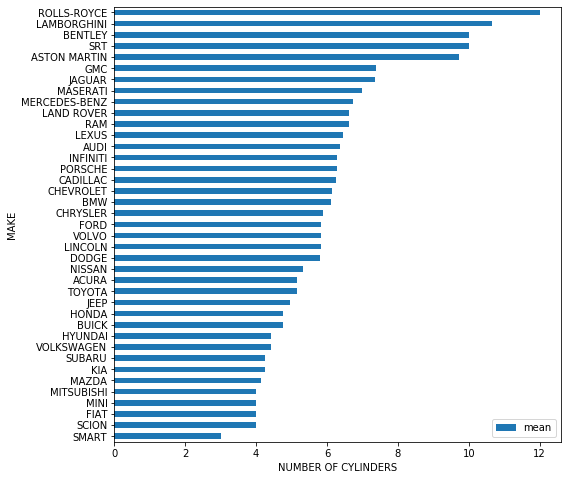

In [7]:
df=carros.groupby('MAKE').CYLINDERS.agg(['count', 'mean', 'min', 'max']).sort_values('mean',ascending=False)
df[['mean']].sort_values('mean').plot(kind='barh',figsize=(8,8))
plt.xlabel('NUMBER OF CYLINDERS')
plt.show()

 ROLLS ROYCE is the car maker that has the highest mean number of cylinders followed by LAMBORGHINI 

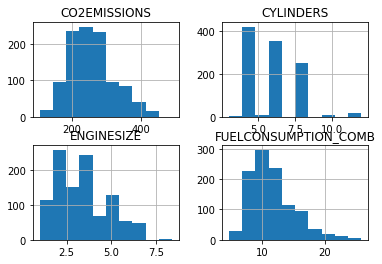

In [8]:
#Visualizing the variable distributions
frame1 = carros[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
frame1.hist();

In [9]:
carros.shape 

(1067, 13)

In [10]:
#Looking for further data information and data types
carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


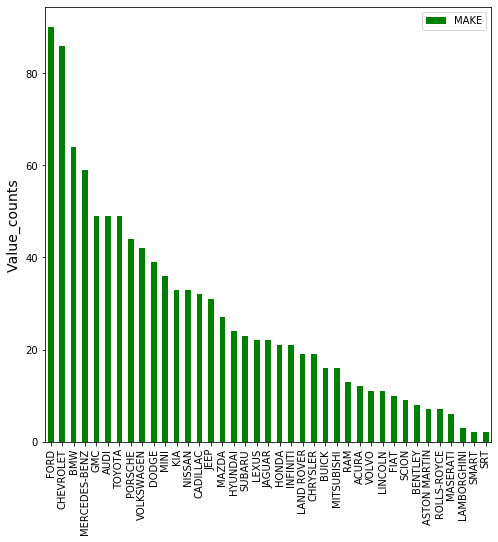

In [11]:
#Count of each Car maker in the dataset:
carros.MAKE.value_counts().plot(kind='bar',figsize=(8,8),color='green',legend=True)
plt.ylabel('Value_counts',fontsize=14)
plt.show()

#### Average CO2 EMISSIONS by Car Maker:

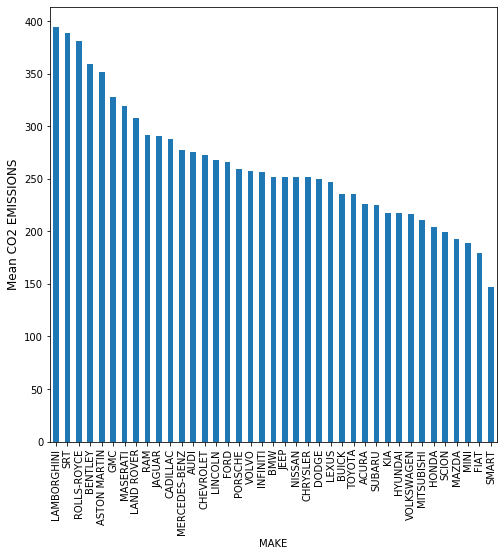

In [12]:
A=carros.groupby('MAKE').CO2EMISSIONS.mean().sort_values(ascending=False)
A.plot(kind='bar',figsize=(8,8)) 
plt.ylabel('Mean CO2 EMISSIONS',fontsize=12)
plt.show()

#### Looking for relations between dependent variables and the target variable through some visualizations:

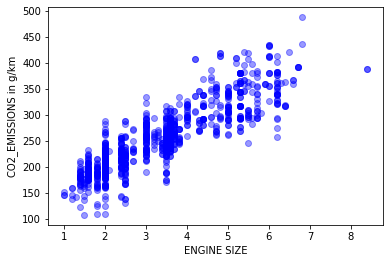

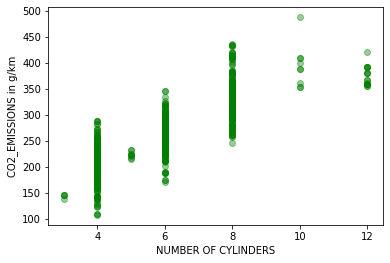

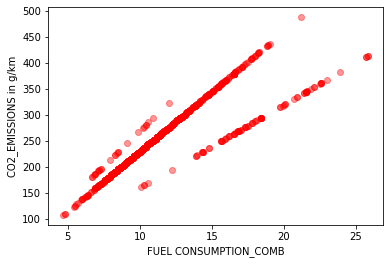

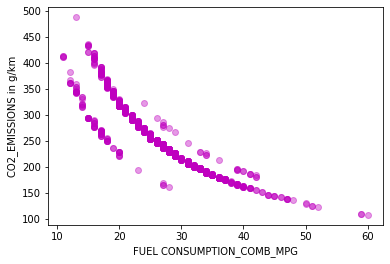

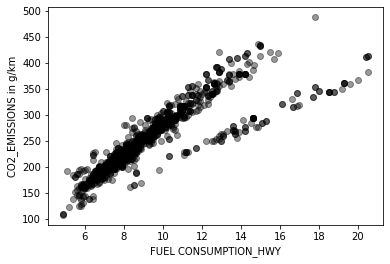

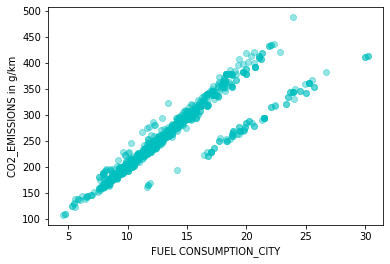

In [13]:
#ENGINE SIZE vs CO2 EMISSIONS
plt.scatter(carros.ENGINESIZE,carros.CO2EMISSIONS,color='blue',alpha=0.4)
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2_EMISSIONS in g/km')
plt.show()
#There is an approximate linear relationship between Engine Size and CO2 Emissions

#NUMBER OF CYLINDERS vs CO2 EMISSIONS
plt.scatter(carros.CYLINDERS,carros.CO2EMISSIONS,color='green',alpha=0.4)
plt.xlabel('NUMBER OF CYLINDERS')
plt.ylabel('CO2_EMISSIONS in g/km')
plt.show()
#There is a relation between number of cylinders and CO2 Emissions with increasing number of cylinders.

#FUEL CONSUMPTION_COMB vs CO2 EMISSIONS
plt.scatter(carros.FUELCONSUMPTION_COMB,carros.CO2EMISSIONS,color='red',alpha=0.4)
plt.xlabel('FUEL CONSUMPTION_COMB')
plt.ylabel('CO2_EMISSIONS in g/km')
plt.show()
#There is also certain degree of correlation between FUEL CONSUMPTION_COMB and CO2 EMISSIONS

#FUEL CONSUMPTION_COMB_MPG vs CO2 EMISSIONS
plt.scatter(carros.FUELCONSUMPTION_COMB_MPG,carros.CO2EMISSIONS,color='m',alpha=0.4)
plt.xlabel('FUEL CONSUMPTION_COMB_MPG')
plt.ylabel('CO2_EMISSIONS in g/km')
plt.show()
#There is a negative correlation.

#FUEL CONSUMPTION_COMB vs CO2 EMISSIONS
plt.scatter(carros.FUELCONSUMPTION_HWY,carros.CO2EMISSIONS,color='k',alpha=0.4)
plt.xlabel('FUEL CONSUMPTION_HWY')
plt.ylabel('CO2_EMISSIONS in g/km')
plt.show()
#There is a positive correlation

#FUEL CONSUMPTION_COMB vs CO2 EMISSIONS
plt.scatter(carros.FUELCONSUMPTION_CITY,carros.CO2EMISSIONS,color='c',alpha=0.4)
plt.xlabel('FUEL CONSUMPTION_CITY')
plt.ylabel('CO2_EMISSIONS in g/km')
plt.show()
#There is a positive correlation

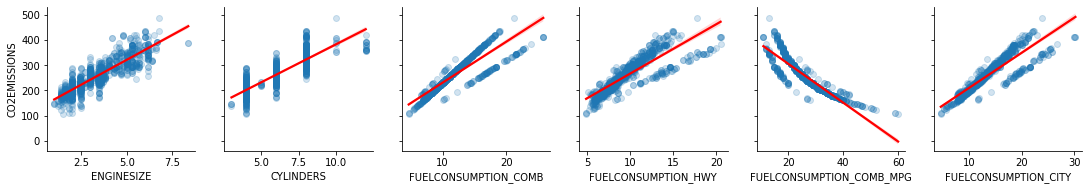

In [14]:
# multiple scatterplots in Seaborn:
feature_cols=['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB_MPG','FUELCONSUMPTION_CITY']
sns.pairplot(carros, x_vars=feature_cols, y_vars='CO2EMISSIONS', kind='reg',plot_kws={'line_kws':{'color':'red'}, 
                                                                                      'scatter_kws': {'alpha': 0.2}});

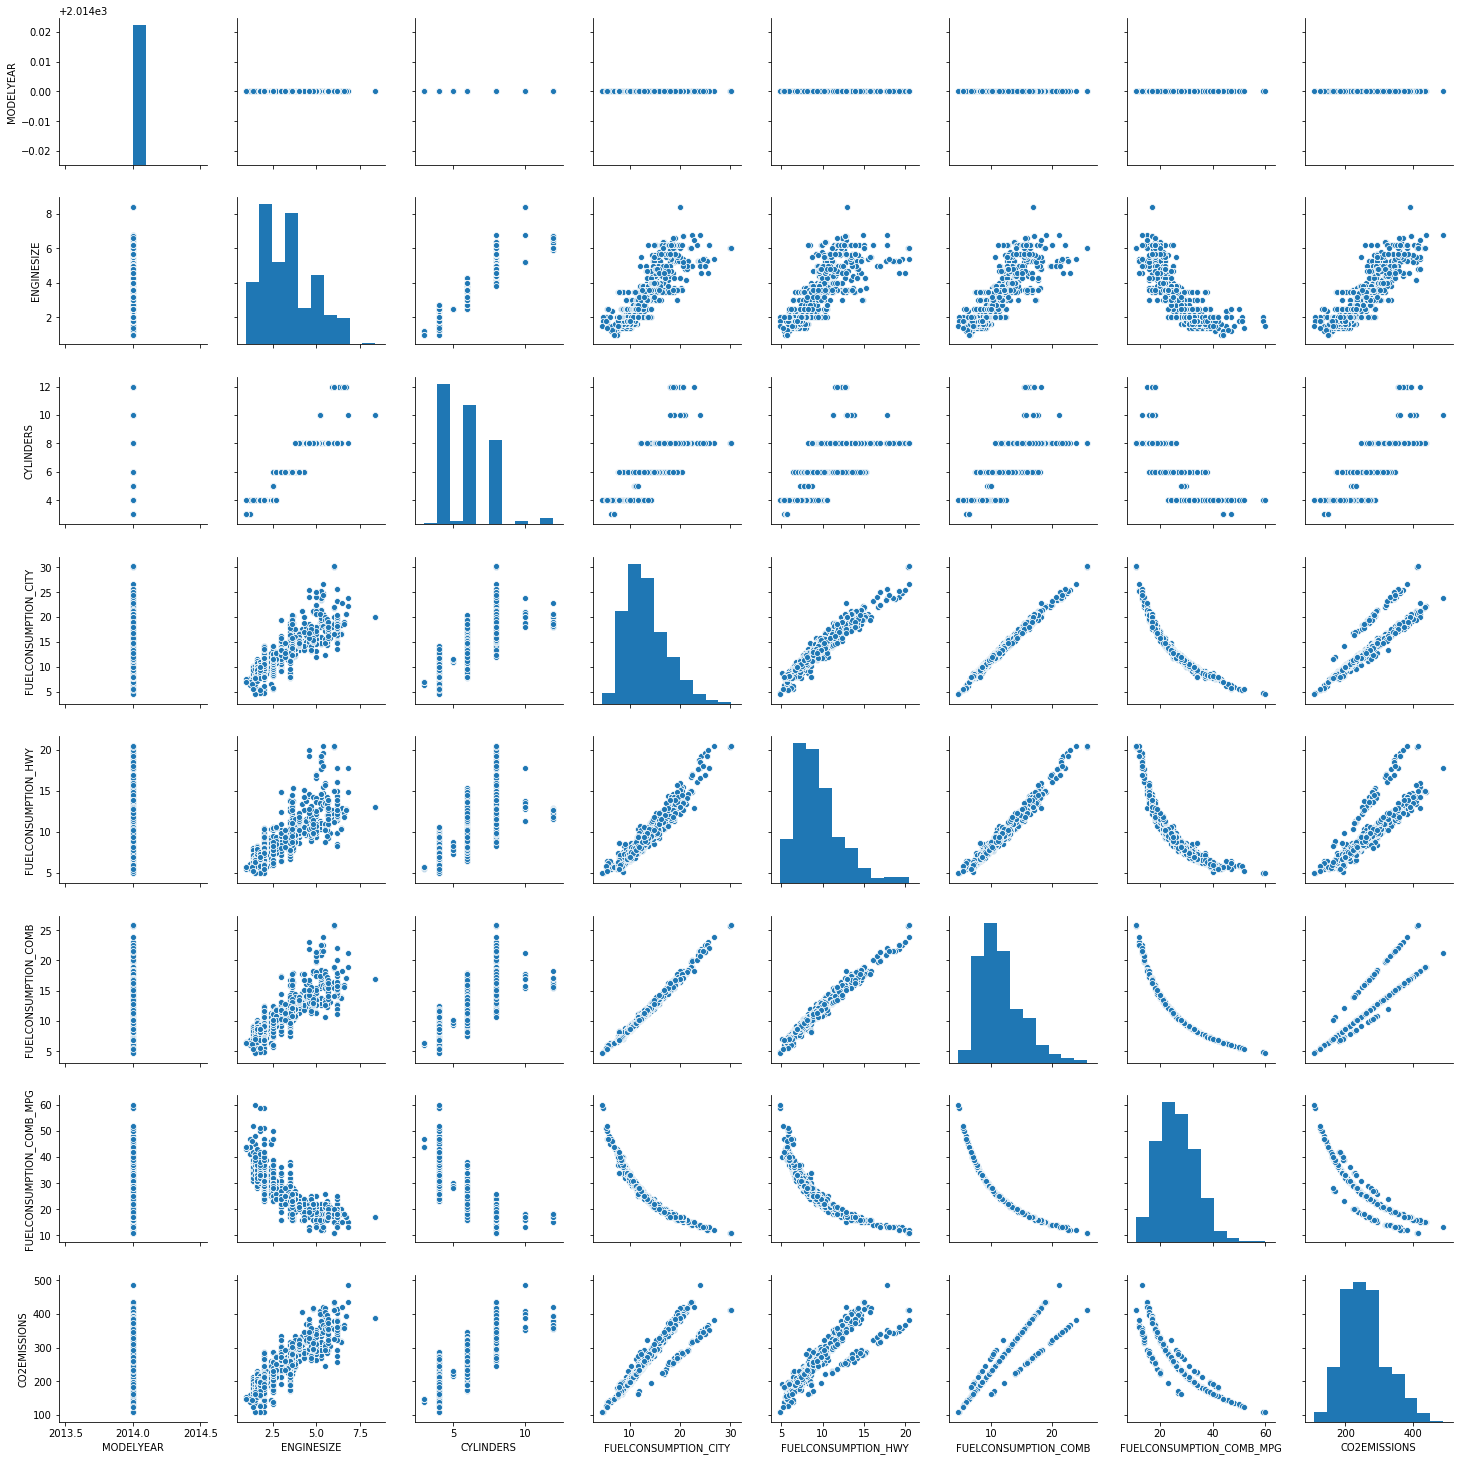

In [41]:
#We can see display a complete visualization of the entire dataset and the relationships between the predictors and the output
#variable with Seaborn. We can also the distribution types of the variables present in this dataset:
sns.pairplot(carros);

### Looking at the correlation matrix: 

In [15]:
features_corr=['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']
carros[features_corr].corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


There is a strong correlation between de dependent variables and the target variable **(CO2 EMISSIONS)**. However, there is a high degree of correlation of the dependent variables with each other, which may lead to multicollinearity in our model. This would make very hard to interpret the regression coefficients if we don't take care of multicollinearity

## Building a linear regression model

1. #### In this first model, we are going to use a feature matrix called `X` as DataFrame corresponding to the numerical independent variables: 
`ENGINESIZE`,`CYLINDERS`,`FUELCONSUMPTION_COMB`,`FUELCONSUMPTION_HWY`,`FUELCONSUMPTION_CITY`,`FUELCONSUMPTION_COMB_MPG` and a series called `y`corresponding to the  variable `CO2EMISSIONS` 

In [16]:
feature_col=['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB_MPG'] 
X=carros[feature_col]
y=carros.CO2EMISSIONS

In [17]:
#Checking the shape of X and y:
X.head()
y.head()
print(X.shape)
print(y.shape)

(1067, 6)
(1067,)


In [18]:
X.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_HWY,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB_MPG
0,2.0,4,8.5,6.7,9.9,33
1,2.4,4,9.6,7.7,11.2,29
2,1.5,4,5.9,5.8,6.0,48
3,3.5,6,11.1,9.1,12.7,25
4,3.5,6,10.6,8.7,12.1,27


#### We first instantiate a `LinearRegression` model on X and y from the `linear_model` section of Scikit learn

In [19]:
# We make an instance of a LinearRegression object.
lr=LinearRegression()

In [20]:
#We apply the train_test_split function to the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [21]:
#We then fit the model with the train data
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
#Then we predict 
y_pred=lr.predict(X_test)

In [23]:
#Model coefficients:
print(lr.coef_)
print(lr.intercept_)

[ 9.0256947   7.48707661 -4.54188186  6.40234547  2.016369   -3.79140014]
248.526989917346


We then calculate the Root mean square error (RMSE) of the model and the R2 score:

In [24]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:',lr.score(X_test,y_test))

RMSE: 22.50135536722221
R2: 0.8615806945336713


#### We define a function that accepts a list of features and returns testing RMSE

In [25]:
# Define a function that accepts a list of features and returns testing RMSE.
from sklearn.metrics import r2_score
def train_test_rmse(carros, feature_col):
    X = carros[feature_col]
    y = carros.CO2EMISSIONS
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [26]:
carros.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

#### 2. We apply the function created before to assess the best features

Features: `ENGINE SIZE`, `CYLINDERS`, `FUELCONSUMPTION_COMB_MPG`

In [27]:
feature_col=['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB_MPG']
train_test_rmse(carros,feature_col)
X1=carros[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y1=carros.CO2EMISSIONS
lr1=LinearRegression()
lr1.fit(X1,y1)
print('Coefficients:',lr1.coef_)
print('Intercept:',lr1.intercept_)
print('RMSE:', train_test_rmse(carros,feature_col))

Coefficients: [10.85524041  7.51622501  9.59563161]
Intercept: 65.22328417194532
RMSE: 22.807001715213055


Features: `ENGINE SIZE`

In [28]:
feature_col1=['ENGINESIZE']
print('RMSE:',train_test_rmse(carros,feature_col1))

RMSE: 31.826387017407185


Features: `ENGINE SIZE`, `CYLINDERS`

In [29]:
feature_col2=['ENGINESIZE','CYLINDERS']
print('RMSE:', train_test_rmse(carros,feature_col2))

RMSE: 31.10684660103531


In [30]:
feature_col3=['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB_MPG','FUELCONSUMPTION_HWY']
#print('RMSE:',train_test_rmse(carros,feature_col3))
X=carros[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB_MPG','FUELCONSUMPTION_HWY']]
y=carros.CO2EMISSIONS

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=123)
lr3=LinearRegression()
lr3.fit(X_train,y_train)
y_pred=lr3.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(lr3.coef_)

22.50790077258178
[ 9.02191312  7.33992459 -3.7164051   3.92300052]


#### NULL RMSE
Null RMSE is the RMSE that could be achieved by always predicting the mean response value

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Create a NumPy array with the same shape as y_test.
y_null = np.zeros_like(y_test, dtype=float) 

# Fill the zeros array with the mean value of y_test.
y_null.fill(y_test.mean()) 

print('NULL RMSE:' ,np.sqrt(metrics.mean_squared_error(y_test, y_null)))

NULL RMSE: 60.479799911288914


#### Feature selection
Often it is best not to use all of your features, for at least two reasons:

1. Using more features makes your model harder to interpret.
1. Removing features may improve overall predictive performance by reducing overfitting.
These problems become particularly acute when you start using feature engineering to generate derived features.

One of the ways by which we can do feature engineering is looking at the correlation between the dependent variable and the target variable.

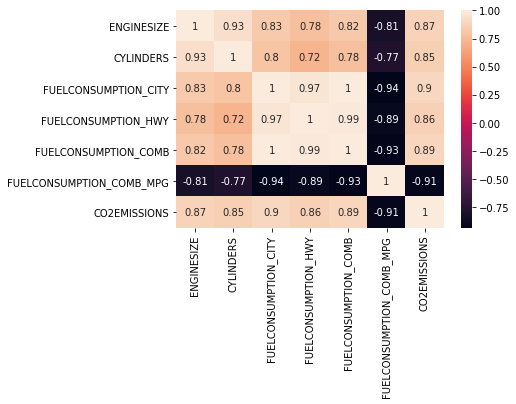

In [32]:
# Visualize correlation matrix in Seaborn using a heat map.
sns.heatmap(carros[features_corr].corr(), annot=True)

There is a strong relation between the dependent variables and with the target variable. It would be suitable that just a few of the estimators are included in the model in order to prevent multicollinearity and increase interpretability of the model.

#### 3. Feature selection

#### Lasso regression

Lasso regression shrinks irrelevant coefficients of the model all the way to zero, thus removing them from the model. This is specially useful in this case since we observe high correlation between de dependent variables

In [33]:
# Initialize the StandardScaler object
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,  LinearRegression, LassoCV
from sklearn.model_selection import cross_val_score
col=['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']
X=carros[col]
y=carros.CO2EMISSIONS

#We need to standardize the X matrix before building the model: 
ss = StandardScaler()

# use the "fit_transform" function to standardize the X design matrix
Xs = ss.fit_transform(X)

In [34]:
#We use the LassoCV function with cross validation to find the optimal alpha of the Lasso regression:
optimal_lasso = LassoCV(n_alphas=500, cv=10)
optimal_lasso.fit(Xs, y)

print(optimal_lasso.alpha_)

0.17377005891306957


In [35]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = -cross_val_score(lasso, Xs, y, cv=10,scoring='neg_root_mean_squared_error')

print(lasso_scores)
print('RMSE:' ,np.mean(lasso_scores))

[18.92147428 18.49326886 31.43412965 28.21395252 27.47289082 17.1780104
 17.57085035 18.20100055 15.33114309 14.35162441]
RMSE: 20.716834491910802


In [36]:
#COEFFICIENTS:

lasso.fit(Xs, y)
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(10)

,variable,coef,abs_coef
5,FUELCONSUMPTION_COMB_MPG,-27.889653,27.889653
1,CYLINDERS,13.279913,13.279913
0,ENGINESIZE,12.141865,12.141865
3,FUELCONSUMPTION_HWY,10.406417,10.406417
2,FUELCONSUMPTION_CITY,0.000000,0.000000
4,FUELCONSUMPTION_COMB,0.000000,0.000000


From Lasso regression we can notice that the relevant coefficients for our regression are the first 4 variables: `FUELCONSUMPTION_COMB_MPG` ,`CYLINDERS`,  `ENGINESIZE` and `FUELCONSUMPTION_HWY`. So from there on, we will consider only those variables in our model and we will calculate its accuracy with a cross validation 

#### 4. Model assesment with cross validation

#### Cross validation with KFolds


In [37]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score,KFold

In [38]:
kf = model_selection.KFold(n_splits=5, shuffle=True) 
lr=LinearRegression()
X=carros[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB_MPG','FUELCONSUMPTION_HWY']]
y=carros.CO2EMISSIONS

In [39]:
from sklearn.model_selection import cross_val_score
print('RMSE:', np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_root_mean_squared_error')))
print('R2:' ,np.mean(cross_val_score(lr, X, y, cv=kf))) 

RMSE: 21.26045214587171
R2: 0.8864173019042931


It performs better than with the train_test_split. This is because with cross validation we obtain a more reliable out-of-sample accuracy as a result of giving the model the opportunity to be trained on every set of data available.

Also, since our data size is not big enough, it is preferable to work with K-folds cross validation to guarantee good out-of-sample accuracy